In [185]:
#!pip install xgboost

In [186]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [187]:
# train data
train_df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Colab Notebooks/Datasets/loan_train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [188]:
# test data
test_df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Colab Notebooks/Datasets/loan_test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [189]:
print(train_df.shape) # size of train data
print(test_df.shape) # size of test data

(614, 13)
(367, 12)


In [190]:
# column information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [191]:
# summary information
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [192]:
# drop the ID column for train and test datasets 
train_df.drop('Loan_ID',axis=1,inplace=True)
test_df.drop('Loan_ID',axis=1,inplace=True)

In [193]:
# missing values in the data
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [194]:
# filling the missing data with the mode
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for column in null_cols:
  train_df[column].fillna(train_df[column].mode()[0], inplace=True)

In [195]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Exploration

In [196]:
# split the train data to categorical and numeric data

# list of all the numeric columns
num = train_df.select_dtypes('number').columns.to_list()
# list of all the categoric columns
cat = train_df.select_dtypes('object').columns.to_list()

In [197]:
# numeric df
loan_num =  train_df[num]
# categoric df
loan_cat = train_df[cat]

In [198]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

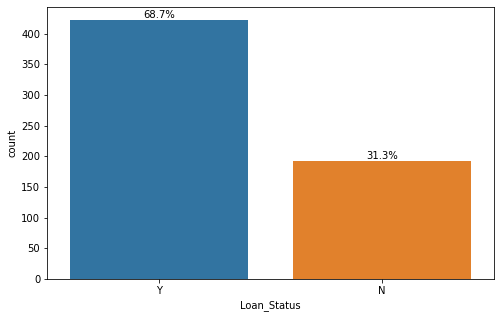

In [199]:
total = len(train_df['Loan_Status'])
plt.figure(figsize=(8,5))
#sns.set(style="whitegrid")
ax = sns.countplot(x='Loan_Status', data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.1f}%'.format(100.*height/total),ha="center") 
plt.show()

This plot shows that out of the loan requests submitted, 68.7% loan requests are granted and 31.3% requests are denied.

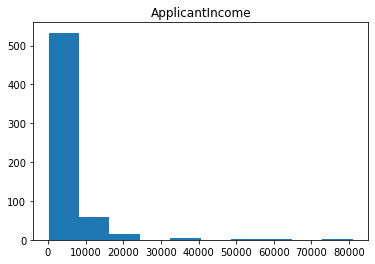

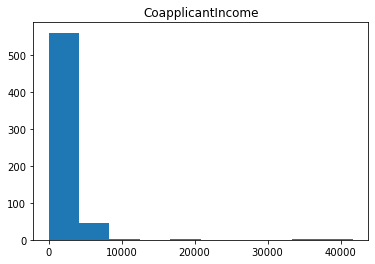

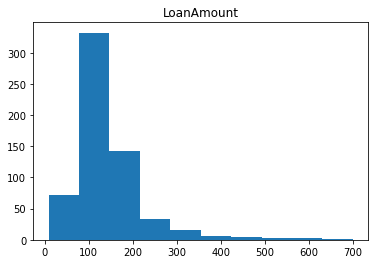

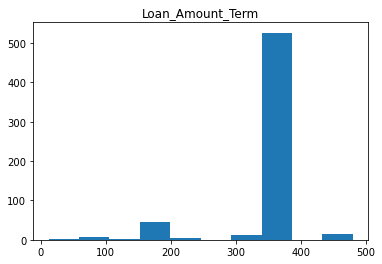

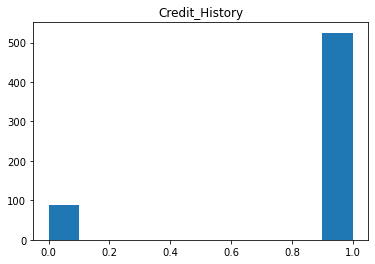

In [200]:
# exploring the numeric data
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

#### Insights regarding the charts
The above charts shows that the applicants and the coapplicants' income are not so high and the loan amount requested is mostly in the region of 100-200; the loan amount term  is majorly around 360 months and their credit history have a majority score of 1.

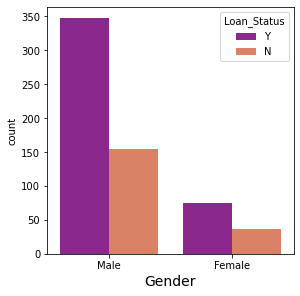

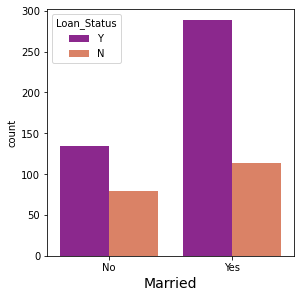

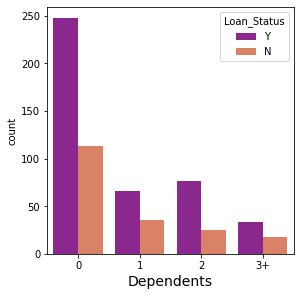

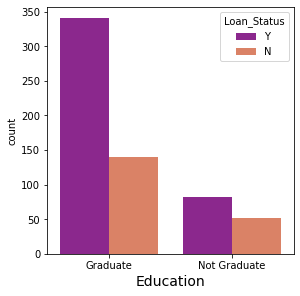

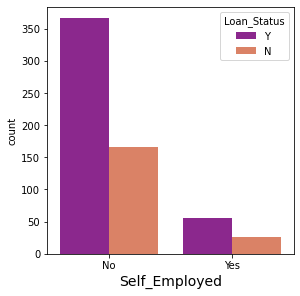

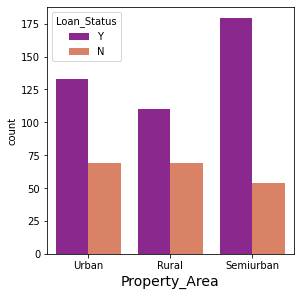

In [201]:
for i in loan_cat.iloc[:,:-1]: 
    plt.figure(figsize=(15, 10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df, palette='plasma')
    plt.xlabel(i, fontsize=14)

#### Insights about the charts

The categorical plots show the following:

*   Males have high chances of getting a loan
*   Married individuals also have high chances of getting a loan
*   Individuals who don't have dependents have high chances of getting a loan
*   Graduates have high chances of getting a loan
*   Self employed individuals have low chances of getting a loan
*   Out of all semiurban people who apply for a loan more than half of them got a loan.









In [202]:
train_df['Loan_Status'].replace('N',0,inplace=True)
train_df['Loan_Status'].replace('Y',1,inplace=True)

In [203]:
# correlation table
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/bc/5zhwt8p53b1gbm8gb4x9xwrr0000gn/T/ipykernel_55841/3138000395.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.00,-0.12,0.56,-0.05,-0.02,-0.00
CoapplicantIncome,-0.12,1.00,0.19,-0.06,0.01,-0.06
LoanAmount,0.56,0.19,1.00,0.04,-0.00,-0.03
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,-0.00,-0.02
Credit_History,-0.02,0.01,-0.00,-0.00,1.00,0.54
Loan_Status,-0.00,-0.06,-0.03,-0.02,0.54,1.00


In [204]:
target = train_df['Loan_Status']
# get dummies
loan_cat = pd.get_dummies(loan_cat.iloc[:,:-1])
# merge into datafram
train_df2 = pd.concat([loan_cat, loan_num, target], axis=1)

In [205]:
# split the data
X = train_df2.iloc[:,:-1].values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [206]:
# decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_predict = tree.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)

              precision    recall  f1-score   support

           0       0.57      0.67      0.61        39
           1       0.83      0.76      0.80        84

    accuracy                           0.73       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.75      0.73      0.74       123



In [207]:
# random forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)

              precision    recall  f1-score   support

           0       0.71      0.44      0.54        39
           1       0.78      0.92      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.76      0.76      0.75       123



In [208]:
# XGBoost
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)

              precision    recall  f1-score   support

           0       0.74      0.51      0.61        39
           1       0.80      0.92      0.86        84

    accuracy                           0.79       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.79      0.78       123



In [209]:
# logistic regression
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [210]:
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search_cv = GridSearchCV(XGBClassifier(random_state=42), params, scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
0.7474927584670232


In [211]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.804878
2,XGBoost,0.788618
1,Random Forest,0.764228
0,Decision Tree,0.731707


Logistic Regression performed better than the XGBoost, Decision tree and Random Forest models. There is still room for improvement by fine tuning their parameters based on the accuracy of the models.

# **Using the model on the new test data**

In [212]:
# filling the missing data with the mode
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for column in null_cols:
  test_df[column].fillna(train_df[column].mode()[0], inplace=True)

In [213]:
# get the dummies for the test data
test = pd.get_dummies(test_df.iloc[:, [0,1,2,3,4,10]])

In [214]:
# drop the categorical variables
test_df.drop(['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area'], axis=1, inplace=True)

In [215]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0


In [216]:
test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [217]:
# concatenate the dummies with the test data
new_test = pd.concat([test,test_df], axis=1)

In [218]:
new_test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,5720,0,110.0,360.0,1.0
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,3076,1500,126.0,360.0,1.0
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,5000,1800,208.0,360.0,1.0
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,2340,2546,100.0,360.0,1.0
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,3276,0,78.0,360.0,1.0


In [219]:
# convert the test data to array
new_x = new_test.values

In [220]:
# using the model to predict the new loan status
y_preds = LR.predict(new_x)

In [221]:
# The loan status prediction on the new data
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [222]:
# join the predicted loan status with the features
my_array = np.column_stack((new_x, y_preds))

In [223]:
# dataframe for the new predicted data
new_data = pd.DataFrame(my_array, columns=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Loan_Status'])

In [224]:
# Preview of the new data
new_data.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5720.0,0.0,110.0,360.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3076.0,1500.0,126.0,360.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5000.0,1800.0,208.0,360.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2340.0,2546.0,100.0,360.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,3276.0,0.0,78.0,360.0,1.0,1.0
